In [1]:
# python
import sys
import os
import importlib
from coffea import processor
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak   #numpy like module for handling arrays

# local
sys.path.insert(1, os.path.join(sys.path[0], '../../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities, scaleout
# always reload local modules to pick up changes during development
importlib.reload(ffschema)  #why do we need this?
importlib.reload(sidm_processor) 
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
import hist
utilities.set_plot_style()
%matplotlib inline

In [2]:
samples = [
    #"2Mu2E_100GeV_5GeV_400mm",
    #"2Mu2E_100GeV_5GeV_0p4mm",
    #"2Mu2E_150GeV_5GeV_2p7mm",
    "2Mu2E_200GeV_0p25GeV_10mm",
    "2Mu2E_200GeV_1p2GeV_48mm",
    "2Mu2E_200GeV_5GeV_200mm",
    # "2Mu2E_500GeV_5GeV_80mm",
    #"2Mu2E_500GeV_1p2GeV_19mm",
    #"2Mu2E_500GeV_0p25GeV_4mm",
    #"2Mu2E_500GeV_5GeV_80mm",
    #"2Mu2E_800GeV_5GeV_0p5mm",
    #"2Mu2E_1000GeV_5GeV_0p4mm",
    #"2Mu2E_1000GeV_5GeV_0p04mm",
    #"2Mu2E_1000GeV_5GeV_20mm",
    #"2Mu2E_100GeV_1p2GeV_9p6mm",
    #"2Mu2E_1000GeV_5GeV_40mm",
    #"2Mu2E_1000GeV_0p25GeV_2mm",
    #"2Mu2E_100GeV_p25GeV_400mm",
   # "2Mu2E_1000GeV_5GeV_4mm",
    
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

In [3]:
channels = [
        "baseNoLj_A_ee_highPtA_lowLxyA_eIdBit2to8",
        "baseNoLj_A_ee_matched_lj_highPT_lowLxyA_eIdBit2to8",
        #"baseNoLj_A_ee_matched_lj",
        #"baseNoLj_A_mumu_matched_lj"
        "baseNoLj_A_ee_highPtA_lowLxyA",
        "baseNoLj_A_ee_matched_lj_highPT_lowLxyA",
        #"baseNoLj_A_mumu_highPtA_LxyUpto400A",
        #"baseNoLj_A_mumu_matched_lj_highPT_LxyUpto400A",
        #"baseNoLj_A_mumu_highPtA_lowLxyA",
        #"baseNoLj_A_mumu_matched_pfMuLj_highPT_LxyUpto400A",
        #"baseNoLj_A_mumu_matched_dsaMuLj_highPT_LxyUpto400A",
        #"baseNoLj_A_mumu_matched_2dsaMuLj_highPT_LxyUpto400A",
        #"baseNoLj_A_mumu_matched_1dsa1pfMuLj_highPT_LxyUpto400A",
        #"baseNoLj_A_mumu_matched_lj_highPT_lowLxyA",
        #"baseNoLj_promptA",
        #"baseNoLj_displacedA",
        #"baseNoLj_veryDisplacedA",
        #"baseNoLj_lowLxyA",
        #"baseNoLj_highPtA",
        #"baseNoLj_A_ee_highPtA_Lxyto5A",
        #"baseNoLj_A_ee_matched_lj_highPT_Lxy0to5A",
        #"baseNoLj_A_ee_highPtA_Lxy40to77A",
        #"baseNoLj_A_ee_highPtA_Lxy40to77A",
        #"baseNoLj_A_ee_matched_lj_highPT_Lxy40to77A",
        #"baseNoLj_A_ee_highPtA_Lxy125to135A",
        #"baseNoLj_A_ee_matched_lj_highPT_Lxy125to135A",
        #"baseNoLj_Lxy_upto250A",
        #"2mu2e",
        #"baseNoLj_A_mumu_matched_2dsaMuLj_highPT_LxyUpto400A_genMu0_pT50to60",
        #"baseNoLj_A_mumu_highPtA_LxyUpto400A_genMu0_pT50to60",
        #"baseNoLj_A_ee_highPtA_lowLxyA_eIdBit2to8"
        
    ]

In [4]:
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
    )

p = sidm_processor.SidmProcessor(
    channels,
    ["gen_base", 
    #"lepton_genLepton_base",
     "electron_base",
     "lj_base",
    ], 
     lj_reco_choices = [ "0.4"],
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)


Output()

Output()

Not applying any obj cuts after lj clustering for channel  baseNoLj_A_ee_highPtA_lowLxyA_eIdBit2to8

Not applying any obj cuts after lj clustering for channel  baseNoLj_A_ee_highPtA_lowLxyA

electrons ['pT > 10 GeV', '|eta| < 2.4', 'bits2-8']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


electrons ['pT > 10 GeV', '|eta| < 2.4', 'bits2-8']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

genAs_toE ['dR(A, LJ) < 0.4']

electrons ['pT > 10 GeV', '|eta| < 2.4', 'bits2-8']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

genAs_toE ['dR(A, LJ) < 0.4']

electrons ['pT > 10 GeV', '|eta| < 2.4', 'looseID']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

electrons ['pT > 10 GeV', '|eta| < 2.4', 'looseID']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

genAs_toE ['dR(A, LJ) < 0.4']

Not applying any obj cuts after lj clustering for channel  baseNoLj_A_ee_highPtA_lowLxyA_eIdBit2to8

Not applying any obj cuts after lj clustering for channel  baseNoLj_A_ee_highPtA_lowLxyA

electrons ['pT > 10 GeV', '|eta| < 2.4', 'bits2-8']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

electrons ['pT > 10 GeV', '|eta| < 2.4', 'bits2-8']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

genAs_toE ['dR(A, LJ) < 0.4']

electrons ['pT > 10 GeV', '|eta| < 2.4', 'looseID']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

electrons ['pT > 10 GeV', '|eta| < 2.4', 'looseID']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

genAs_toE ['dR(A, LJ) < 0.4']

Not applying any obj cuts after lj clustering for channel  baseNoLj_A_ee_highPtA_lowLxyA_eIdBit2to8

Not applying any obj cuts after lj clustering for channel  baseNoLj_A_ee_highPtA_lowLxyA

electrons ['pT > 10 GeV', '|eta| < 2.4', 'bits2-8']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

electrons ['pT > 10 GeV', '|eta| < 2.4', 'bits2-8']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

genAs_toE ['dR(A, LJ) < 0.4']

electrons ['pT > 10 GeV', '|eta| < 2.4', 'looseID']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

electrons ['pT > 10 GeV', '|eta| < 2.4', 'looseID']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

genAs_toE ['dR(A, LJ) < 0.4']

Not applying any obj cuts after lj clustering for channel  baseNoLj_A_ee_highPtA_lowLxyA_eIdBit2to8

Not applying any obj cuts after lj clustering for channel  baseNoLj_A_ee_highPtA_lowLxyA

electrons ['pT > 10 GeV', '|eta| < 2.4', 'bits2-8']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

electrons ['pT > 10 GeV', '|eta| < 2.4', 'bits2-8']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

genAs_toE ['dR(A, LJ) < 0.4']

electrons ['pT > 10 GeV', '|eta| < 2.4', 'looseID']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

electrons ['pT > 10 GeV', '|eta| < 2.4', 'looseID']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

genAs_toE ['dR(A, LJ) < 0.4']

Not applying any obj cuts after lj clustering for channel  baseNoLj_A_ee_highPtA_lowLxyA_eIdBit2to8

Not applying any obj cuts after lj clustering for channel  baseNoLj_A_ee_highPtA_lowLxyA

electrons ['pT > 10 GeV', '|eta| < 2.4', 'bits2-8']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

electrons ['pT > 10 GeV', '|eta| < 2.4', 'bits2-8']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

genAs_toE ['dR(A, LJ) < 0.4']

electrons ['pT > 10 GeV', '|eta| < 2.4', 'looseID']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

electrons ['pT > 10 GeV', '|eta| < 2.4', 'looseID']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

genAs_toE ['dR(A, LJ) < 0.4']

Not applying any obj cuts after lj clustering for channel  baseNoLj_A_ee_highPtA_lowLxyA_eIdBit2to8

Not applying any obj cuts after lj clustering for channel  baseNoLj_A_ee_highPtA_lowLxyA

electrons ['pT > 10 GeV', '|eta| < 2.4', 'bits2-8']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

electrons ['pT > 10 GeV', '|eta| < 2.4', 'bits2-8']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

genAs_toE ['dR(A, LJ) < 0.4']

electrons ['pT > 10 GeV', '|eta| < 2.4', 'looseID']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

electrons ['pT > 10 GeV', '|eta| < 2.4', 'looseID']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

genAs_toE ['dR(A, LJ) < 0.4']

Not applying any obj cuts after lj clustering for channel  baseNoLj_A_ee_highPtA_lowLxyA_eIdBit2to8

Not applying any obj cuts after lj clustering for channel  baseNoLj_A_ee_highPtA_lowLxyA

electrons ['pT > 10 GeV', '|eta| < 2.4', 'bits2-8']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

electrons ['pT > 10 GeV', '|eta| < 2.4', 'bits2-8']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

genAs_toE ['dR(A, LJ) < 0.4']

electrons ['pT > 10 GeV', '|eta| < 2.4', 'looseID']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

electrons ['pT > 10 GeV', '|eta| < 2.4', 'looseID']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

genAs_toE ['dR(A, LJ) < 0.4']

Not applying any obj cuts after lj clustering for channel  baseNoLj_A_ee_highPtA_lowLxyA_eIdBit2to8

Not applying any obj cuts after lj clustering for channel  baseNoLj_A_ee_highPtA_lowLxyA

electrons ['pT > 10 GeV', '|eta| < 2.4', 'bits2-8']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

electrons ['pT > 10 GeV', '|eta| < 2.4', 'bits2-8']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

genAs_toE ['dR(A, LJ) < 0.4']

electrons ['pT > 10 GeV', '|eta| < 2.4', 'looseID']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

electrons ['pT > 10 GeV', '|eta| < 2.4', 'looseID']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

genAs_toE ['dR(A, LJ) < 0.4']

Not applying any obj cuts after lj clustering for channel  baseNoLj_A_ee_highPtA_lowLxyA_eIdBit2to8

Not applying any obj cuts after lj clustering for channel  baseNoLj_A_ee_highPtA_lowLxyA

electrons ['pT > 10 GeV', '|eta| < 2.4', 'bits2-8']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

electrons ['pT > 10 GeV', '|eta| < 2.4', 'bits2-8']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

genAs_toE ['dR(A, LJ) < 0.4']

electrons ['pT > 10 GeV', '|eta| < 2.4', 'looseID']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

electrons ['pT > 10 GeV', '|eta| < 2.4', 'looseID']

muons ['looseID', 'pT > 5 GeV', '|eta| < 2.4']

photons ['pT > 20 GeV', '|eta| < 2.5', 'looseID']

dsaMuons ['pT > 10 GeV', '|eta| < 2.4', 'ifcsczero', 'segOverlap < 0.66', 'extrapolatedDr > 0.2', 
'isSubsetAnyPFMuon False', 'normChi2 < 4', 'DT + CSC hits > 12', 'DT + CSC stations >= 2', 'ptErrorOverPT < 1']

pvs ['ndof > 4', '|z| < 24 cm', '|rho| < 0.2 mm']

genAs_toE ['pT > 30 GeV', 'lxy <= 150 cm']

genAs_toE ['dR(A, LJ) < 0.4']

In [5]:
ch1 = "baseNoLj_A_ee_highPtA_lowLxyA_eIdBit2to8"
ch2 = "baseNoLj_A_ee_matched_lj_highPT_lowLxyA_eIdBit2to8"
ch3 = "baseNoLj_A_ee_highPtA_lowLxyA"
ch4 = "baseNoLj_A_ee_matched_lj_highPT_lowLxyA"


Text(0.5, 0.98, '2Mu2E_200GeV_5GeV_200mm')

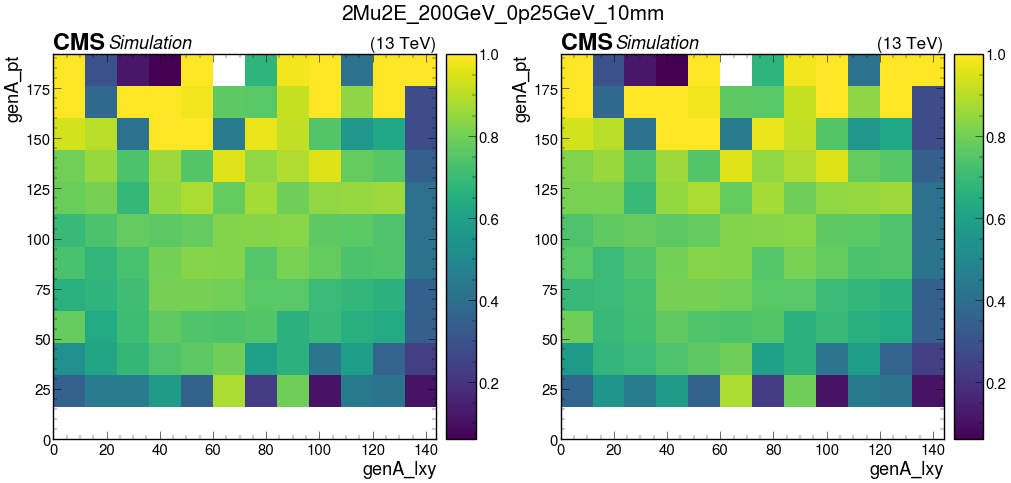

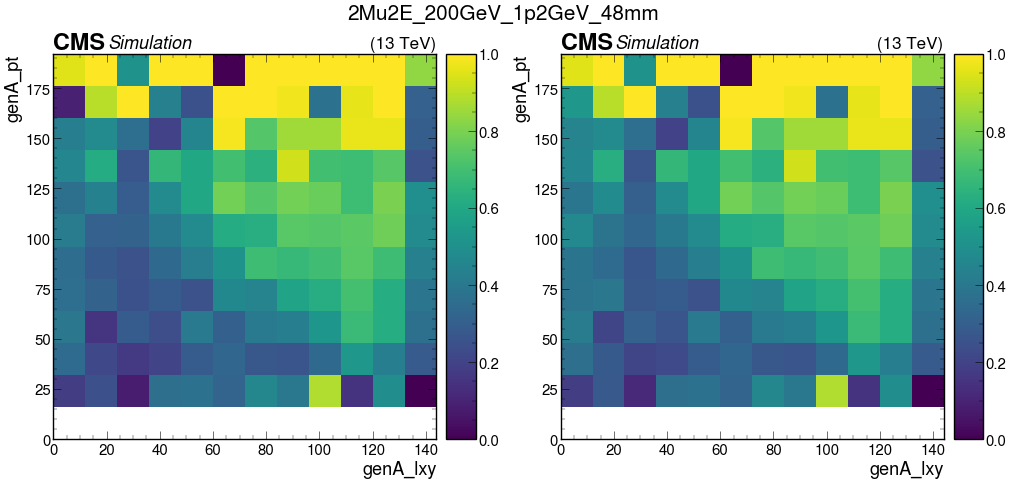

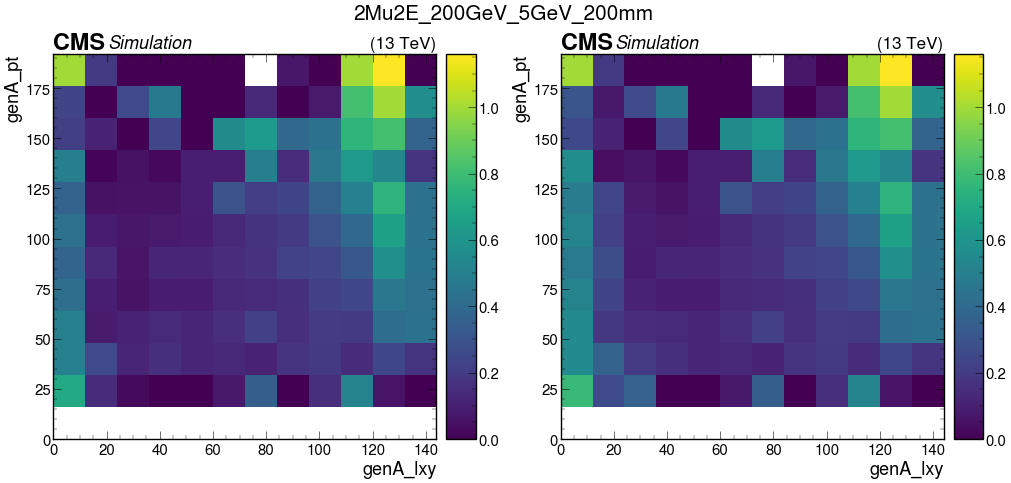

In [9]:
ch1 = "baseNoLj_A_ee_highPtA_lowLxyA_eIdBit2to8"
ch2 = "baseNoLj_A_ee_matched_lj_highPT_lowLxyA_eIdBit2to8"
ch3 = "baseNoLj_A_ee_highPtA_lowLxyA"
ch4 = "baseNoLj_A_ee_matched_lj_highPT_lowLxyA"
fig , ax =plt.subplots(1,2, figsize =(2*12, 10))
hists = output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]
plt.subplot(1, 2, 1)
num_before =  hists["genAs_toE_lxy_pt_lowRange"][ch4,::2j, ::2j]
den_before =  hists["genAs_toE_lxy_pt_lowRange"][ch3,::2j, ::2j]
eff_before, errors_before = utilities.get_eff_hist(num_before, den_before)
utilities.plot(eff_before)
plt.subplot(1, 2, 2)
num_after =  hists["genAs_toE_lxy_pt_lowRange"][ch2,::2j, ::2j]
den_after =  hists["genAs_toE_lxy_pt_lowRange"][ch1,::2j, ::2j]
eff_after, errors_after = utilities.get_eff_hist(num_after, den_after)
utilities.plot(eff_after)
fig.suptitle("2Mu2E_200GeV_0p25GeV_10mm", fontsize=30)

fig , ax =plt.subplots(1,2, figsize =(2*12, 10))
hists = output["out"]["2Mu2E_200GeV_1p2GeV_48mm"]["hists"]
plt.subplot(1, 2, 1)
num_before =  hists["genAs_toE_lxy_pt_lowRange"][ch4,::2j, ::2j]
den_before =  hists["genAs_toE_lxy_pt_lowRange"][ch3,::2j, ::2j]
eff_before, errors_before = utilities.get_eff_hist(num_before, den_before)
utilities.plot(eff_before)
plt.subplot(1, 2, 2)
num_after =  hists["genAs_toE_lxy_pt_lowRange"][ch2,::2j, ::2j]
den_after =  hists["genAs_toE_lxy_pt_lowRange"][ch1,::2j, ::2j]
eff_after, errors_after = utilities.get_eff_hist(num_after, den_after)
utilities.plot(eff_after)
fig.suptitle("2Mu2E_200GeV_1p2GeV_48mm", fontsize=30)

fig , ax =plt.subplots(1,2, figsize =(2*12, 10))
hists = output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]
plt.subplot(1, 2, 1)
num_before =  hists["genAs_toE_lxy_pt_lowRange"][ch4,::2j, ::2j]
den_before =  hists["genAs_toE_lxy_pt_lowRange"][ch3,::2j, ::2j]
eff_before, errors_before = utilities.get_eff_hist(num_before, den_before)
utilities.plot(eff_before)
plt.subplot(1, 2, 2)
num_after =  hists["genAs_toE_lxy_pt_lowRange"][ch2,::2j, ::2j]
den_after =  hists["genAs_toE_lxy_pt_lowRange"][ch1,::2j, ::2j]
eff_after, errors_after = utilities.get_eff_hist(num_after, den_after)
utilities.plot(eff_after)
fig.suptitle("2Mu2E_200GeV_5GeV_200mm", fontsize=30)

Text(0.5, 0.98, '2Mu2E_200GeV_5GeV_200mm')

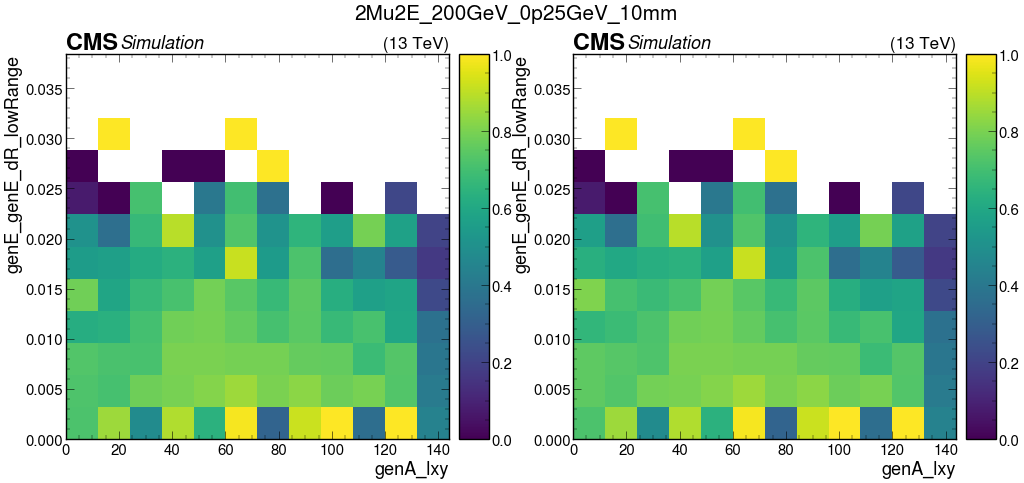

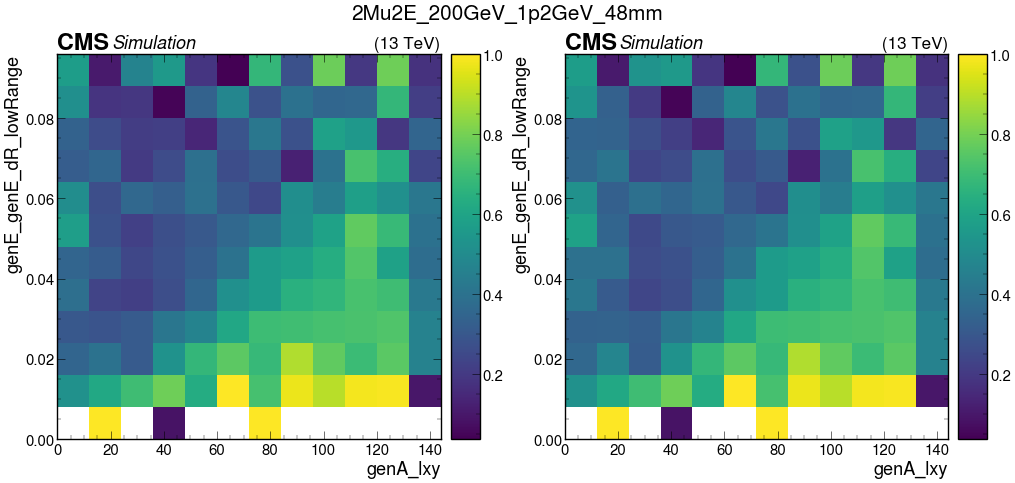

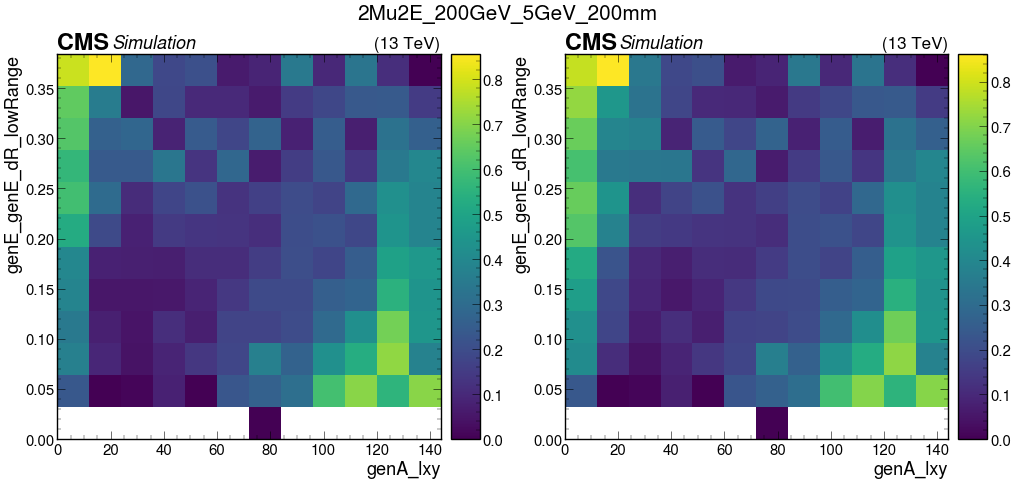

In [10]:
ch1 = "baseNoLj_A_ee_highPtA_lowLxyA_eIdBit2to8"
ch2 = "baseNoLj_A_ee_matched_lj_highPT_lowLxyA_eIdBit2to8"
ch3 = "baseNoLj_A_ee_highPtA_lowLxyA"
ch4 = "baseNoLj_A_ee_matched_lj_highPT_lowLxyA"
fig , ax =plt.subplots(1,2, figsize =(2*12, 10))
hists = output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]
plt.subplot(1, 2, 1)
num_before =  hists["genAs_toE_lxy_EEdR_XXLowRange"][ch4,::2j, ::2j]
den_before =  hists["genAs_toE_lxy_EEdR_XXLowRange"][ch3,::2j, ::2j]
eff_before, errors_before = utilities.get_eff_hist(num_before, den_before)
utilities.plot(eff_before)
plt.subplot(1, 2, 2)
num_after =  hists["genAs_toE_lxy_EEdR_XXLowRange"][ch2,::2j, ::2j]
den_after =  hists["genAs_toE_lxy_EEdR_XXLowRange"][ch1,::2j, ::2j]
eff_after, errors_after = utilities.get_eff_hist(num_after, den_after)
utilities.plot(eff_after)
fig.suptitle("2Mu2E_200GeV_0p25GeV_10mm", fontsize=30)

fig , ax =plt.subplots(1,2, figsize =(2*12, 10))
hists = output["out"]["2Mu2E_200GeV_1p2GeV_48mm"]["hists"]
plt.subplot(1, 2, 1)
num_before =  hists["genAs_toE_lxy_EEdR_XLowRange"][ch4,::2j, ::2j]
den_before =  hists["genAs_toE_lxy_EEdR_XLowRange"][ch3,::2j, ::2j]
eff_before, errors_before = utilities.get_eff_hist(num_before, den_before)
utilities.plot(eff_before)
plt.subplot(1, 2, 2)
num_after =  hists["genAs_toE_lxy_EEdR_XLowRange"][ch2,::2j, ::2j]
den_after =  hists["genAs_toE_lxy_EEdR_XLowRange"][ch1,::2j, ::2j]
eff_after, errors_after = utilities.get_eff_hist(num_after, den_after)
utilities.plot(eff_after)
fig.suptitle("2Mu2E_200GeV_1p2GeV_48mm", fontsize=30)

fig , ax =plt.subplots(1,2, figsize =(2*12, 10))
hists = output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]
plt.subplot(1, 2, 1)
num_before =  hists["genAs_toE_lxy_EEdR"][ch4,::2j, ::2j]
den_before =  hists["genAs_toE_lxy_EEdR"][ch3,::2j, ::2j]
eff_before, errors_before = utilities.get_eff_hist(num_before, den_before)
utilities.plot(eff_before)
plt.subplot(1, 2, 2)
num_after =  hists["genAs_toE_lxy_EEdR"][ch2,::2j, ::2j]
den_after =  hists["genAs_toE_lxy_EEdR"][ch1,::2j, ::2j]
eff_after, errors_after = utilities.get_eff_hist(num_after, den_after)
utilities.plot(eff_after)
fig.suptitle("2Mu2E_200GeV_5GeV_200mm", fontsize=30)

Text(0.5, 0.98, '2Mu2E_200GeV_5GeV_200mm')

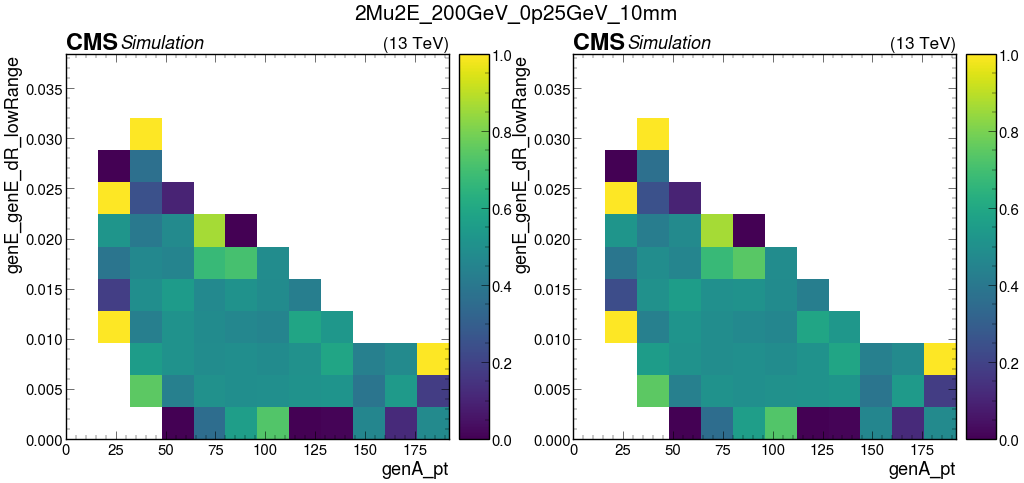

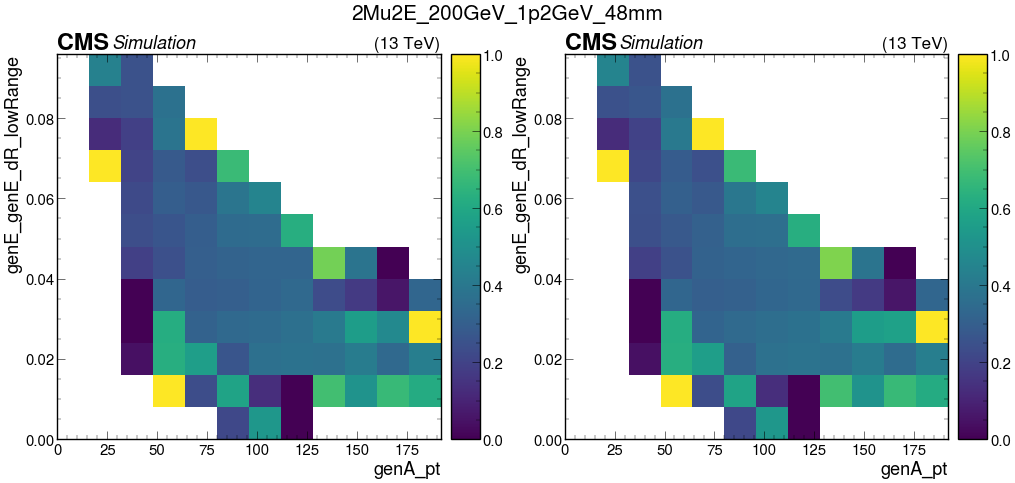

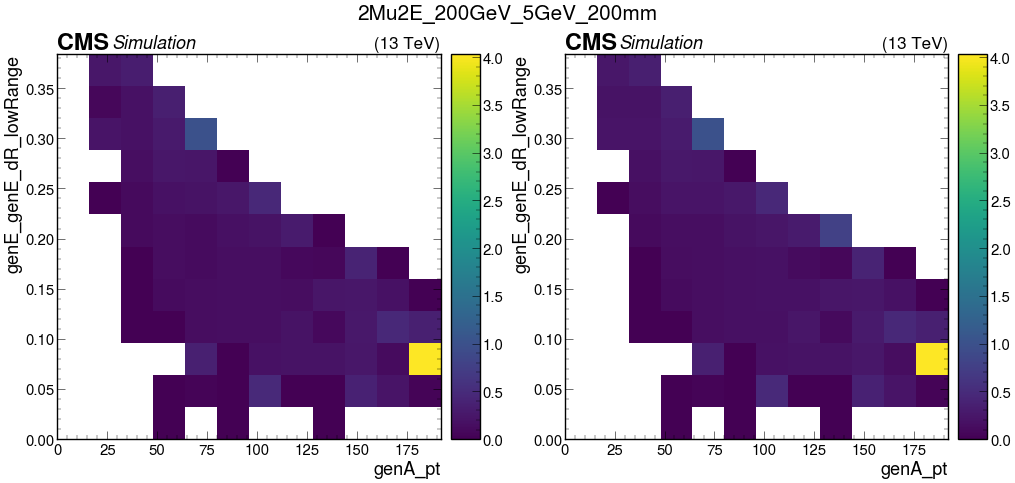

In [12]:
ch1 = "baseNoLj_A_ee_highPtA_lowLxyA_eIdBit2to8"
ch2 = "baseNoLj_A_ee_matched_lj_highPT_lowLxyA_eIdBit2to8"
ch3 = "baseNoLj_A_ee_highPtA_lowLxyA"
ch4 = "baseNoLj_A_ee_matched_lj_highPT_lowLxyA"
fig , ax =plt.subplots(1,2, figsize =(2*12, 10))
hists = output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]
plt.subplot(1, 2, 1)
num_before =  hists["genAs_toE_pt_EEdR_XXLowRange"][ch4,::2j, ::2j]
den_before =  hists["genAs_toE_pt_EEdR_XXLowRange"][ch3,::2j, ::2j]
eff_before, errors_before = utilities.get_eff_hist(num_before, den_before)
utilities.plot(eff_before)
plt.subplot(1, 2, 2)
num_after =  hists["genAs_toE_pt_EEdR_XXLowRange"][ch2,::2j, ::2j]
den_after =  hists["genAs_toE_pt_EEdR_XXLowRange"][ch1,::2j, ::2j]
eff_after, errors_after = utilities.get_eff_hist(num_after, den_after)
utilities.plot(eff_after)
fig.suptitle("2Mu2E_200GeV_0p25GeV_10mm", fontsize=30)

fig , ax =plt.subplots(1,2, figsize =(2*12, 10))
hists = output["out"]["2Mu2E_200GeV_1p2GeV_48mm"]["hists"]
plt.subplot(1, 2, 1)
num_before =  hists["genAs_toE_pt_EEdR_XLowRange"][ch4,::2j, ::2j]
den_before =  hists["genAs_toE_pt_EEdR_XLowRange"][ch3,::2j, ::2j]
eff_before, errors_before = utilities.get_eff_hist(num_before, den_before)
utilities.plot(eff_before)
plt.subplot(1, 2, 2)
num_after =  hists["genAs_toE_pt_EEdR_XLowRange"][ch2,::2j, ::2j]
den_after =  hists["genAs_toE_pt_EEdR_XLowRange"][ch1,::2j, ::2j]
eff_after, errors_after = utilities.get_eff_hist(num_after, den_after)
utilities.plot(eff_after)
fig.suptitle("2Mu2E_200GeV_1p2GeV_48mm", fontsize=30)

fig , ax =plt.subplots(1,2, figsize =(2*12, 10))
hists = output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]
plt.subplot(1, 2, 1)
num_before =  hists["genAs_toE_pt_EEdR_lowRange"][ch4,::2j, ::2j]
den_before =  hists["genAs_toE_pt_EEdR_lowRange"][ch3,::2j, ::2j]
eff_before, errors_before = utilities.get_eff_hist(num_before, den_before)
utilities.plot(eff_before)
plt.subplot(1, 2, 2)
num_after =  hists["genAs_toE_pt_EEdR_lowRange"][ch2,::2j, ::2j]
den_after =  hists["genAs_toE_pt_EEdR_lowRange"][ch1,::2j, ::2j]
eff_after, errors_after = utilities.get_eff_hist(num_after, den_after)
utilities.plot(eff_after)
fig.suptitle("2Mu2E_200GeV_5GeV_200mm", fontsize=30)